___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Tensorflow Project Exercise
Let's wrap up this Deep Learning by taking a a quick look at the effectiveness of Neural Nets!

We'll use the [Bank Authentication Data Set](https://archive.ics.uci.edu/ml/datasets/banknote+authentication) from the UCI repository.

The data consists of 5 columns:

* variance of Wavelet Transformed image (continuous)
* skewness of Wavelet Transformed image (continuous)
* curtosis of Wavelet Transformed image (continuous)
* entropy of image (continuous)
* class (integer)

Where class indicates whether or not a Bank Note was authentic.

This sort of task is perfectly suited for Neural Networks and Deep Learning! Just follow the instructions below to get started!

## Get the Data

** Use pandas to read in the bank_note_data.csv file **

In [3]:
%pip install seaborn

  Using cached seaborn-0.12.2-py3-none-any.whl (293 kB)
Note: you may need to restart the kernel to use updated packages.


DEPRECATION: torchsde 0.2.5 has a non-standard dependency specifier numpy>=1.19.*; python_version >= "3.7". pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of torchsde or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [4]:
import pandas as pd;
import numpy as np;
import sys
import matplotlib.pyplot as plt;
import seaborn as sns;
%matplotlib inline

In [9]:
df = pd.read_csv('./bank_note_data.csv')

In [10]:
df.head()

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


## EDA

Visualizing the data.

** Create a Countplot of the Classes (Authentic 1 vs Fake 0) **

<Axes: >

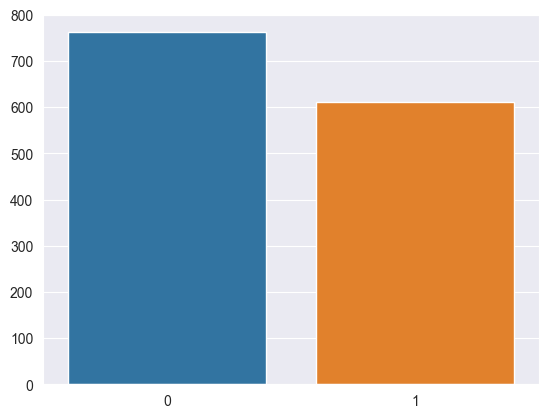

In [21]:
sns.set_style('darkgrid')
sns.barplot(x = df['Class'].value_counts().index, y = df['Class'].value_counts().values)

** Create a PairPlot of the Data with Seaborn, set Hue to Class **

C:\Users\Shahbaz\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


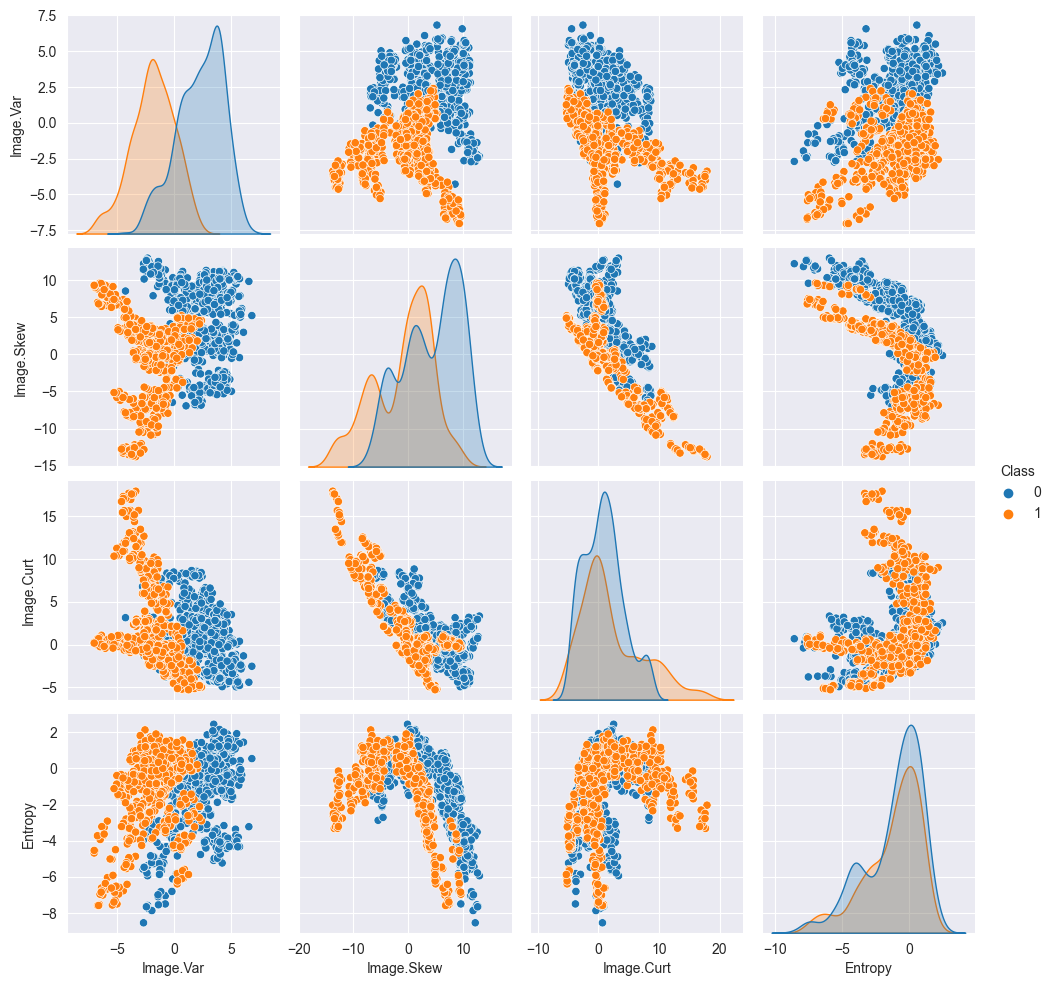

In [22]:
sns.pairplot(df, hue = 'Class')

## Data Preparation 

### Standard Scaling
 [doing this just to be safe; isn't necessary for this data]


In [28]:
%pip install scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/96/cf/a714a655266229b51eb2bda117f15275f12457887f165f3c1cc58ab502f1/scikit_learn-1.3.0-cp310-cp310-win_amd64.whl.metadata
  Obtaining dependency information for joblib>=1.1.1 from https://files.pythonhosted.org/packages/10/40/d551139c85db202f1f384ba8bcf96aca2f329440a844f924c8a0040b6d02/joblib-1.3.2-py3-none-any.whl.metadata
  Obtaining dependency information for threadpoolctl>=2.0.0 from https://files.pythonhosted.org/packages/81/12/fd4dea011af9d69e1cad05c75f3f7202cdcbeac9b712eea58ca779a72865/threadpoolctl-3.2.0-py3-none-any.whl.metadata
  Using cached threadpoolctl-3.2.0-py3-none-any.whl.metadata (10.0 kB)
   ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
   - -------------------------------------- 0.4/9.2 MB 11.6 MB/s eta 0:00:01
   ------- -------------------------------- 1.7/9.2 MB 21.4 MB/s eta 0:00:01
   ------------ --------------------------- 2.9/9.2 MB 23.3 MB/s e

DEPRECATION: torchsde 0.2.5 has a non-standard dependency specifier numpy>=1.19.*; python_version >= "3.7". pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of torchsde or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [29]:
from sklearn.preprocessing import StandardScaler

**Create a StandardScaler() object called scaler.**

In [31]:
scaler = StandardScaler()

**Fit scaler to the features.**

In [42]:
scaler.fit(df.iloc[:, :-1]) # removing last column since it is the target class

StandardScaler()

**Use the .transform() method to transform the features to a scaled version.**

In [43]:
df_scaled = scaler.transform(df.iloc[:, :-1])

**Convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.**

In [47]:
df_scaled = pd.DataFrame(df_scaled)
df_scaled.head()

,0,1,2,3
0,1.121806,1.149455,-0.975970,0.354561
1,1.447066,1.064453,-0.895036,-0.128767
2,1.207810,-0.777352,0.122218,0.618073
3,1.063742,1.295478,-1.255397,-1.144029
4,-0.036772,-1.087038,0.736730,0.096587


## Train Test Split

** Create two objects X and y which are the scaled feature values and labels respectively.**

In [50]:
X = df_scaled
y = df.iloc[:, -1]

** Use SciKit Learn to create training and testing sets of the data as we've done in previous lectures:**

In [51]:
from sklearn.model_selection import train_test_split

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
X_train.columns = df.columns[:-1]
X_test.columns = df.columns[:-1]
X_train.columns

Index(['Image.Var', 'Image.Skew', 'Image.Curt', 'Entropy'], dtype='object')

# Tensorflow

In [53]:
import tensorflow as tf

** Create a list of feature column objects using tf.feature.numeric_column() as we did in the lecture**

In [73]:
X_train_features = [tf.feature_column.numeric_column(X_train[i]) for i in X_train.columns]
X_test_features = [tf.feature_column.numeric_column(X_test[i]) for i in X_test.columns]
df_features = [tf.feature_column.numeric_column(i) for i in df.columns[:-1]]
#df_features = [i for i in df.columns[:-1]]
#df_features = tf.feature_column.numeric_column(df.columns)
#X_test_features = [i for i in X_test.columns]
df_features

[NumericColumn(key='Image.Var', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='Image.Skew', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='Image.Curt', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='Entropy', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]

Index(['Image.Var', 'Image.Skew', 'Image.Curt', 'Entropy'], dtype='object')

** Create an object called classifier which is a DNNClassifier from learn. Set it to have 2 classes and a [10,20,10] hidden unit layer structure:**

In [76]:
from tensorflow.estimator import DNNClassifier
from tensorflow.keras.layers import Dense, Dropout, InputLayer, Input

In [80]:
classifier_model = DNNClassifier(n_classes = 2, hidden_units = [10, 20, 10], feature_columns = X_train.columns)
#classifier_model.add(InputLayer(input_shape = [4]))
#classifier_model.add(Dense(10))
#classifier_model.add(Dense(20))
#classifier_model.add(Dense(10))
#classifier_model.add(Dense(1, activation = 'sigmoid'))


INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Shahbaz\\AppData\\Local\\Temp\\tmpf5q6st91', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


** Now create a tf.estimator.pandas_input_fn that takes in your X_train, y_train, batch_size and set shuffle=True. You can play around with the batch_size parameter if you want, but let's start by setting it to 20 since our data isn't very big. **

In [84]:
from tensorflow.compat.v1.estimator.inputs import pandas_input_fn


In [87]:
inputter = pandas_input_fn(X_train, y_train, batch_size= 20, shuffle = True)
inputter

<function tensorflow_estimator.python.estimator.inputs.pandas_io.pandas_input_fn.<locals>.input_fn()>

** Now train classifier to the input function. Use steps=500. You can play around with these values if you want!**

*Note: Ignore any warnings you get, they won't effect your output*

In [86]:
classifier_model.train(input_fn = inputter, steps = 500)

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.


ValueError: The truth value of a Index is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

## Model Evaluation

** Create another pandas_input_fn that takes in the X_test data for x. Remember this one won't need any y_test info since we will be using this for the network to create its own predictions. Set shuffle=False since we don't need to shuffle for predictions.**

** Use the predict method from the classifier model to create predictions from X_test **

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Marcial\AppData\Local\Temp\tmpw8v7z_z6\model.ckpt-48
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


{'class_ids': array([0], dtype=int64),
 'classes': array([b'0'], dtype=object),
 'logistic': array([0.00157453], dtype=float32),
 'logits': array([-6.4522204], dtype=float32),
 'probabilities': array([0.9984255 , 0.00157453], dtype=float32)}

** Now create a classification report and a Confusion Matrix. Does anything stand out to you?**

[[213   2]
 [ 10 187]]


             precision    recall  f1-score   support

          0       0.96      0.99      0.97       215
          1       0.99      0.95      0.97       197

avg / total       0.97      0.97      0.97       412



## Optional Comparison

** You should have noticed extremely accurate results from the DNN model. Let's compare this to a Random Forest Classifier for a reality check!**

**Use SciKit Learn to Create a Random Forest Classifier and compare the confusion matrix and classification report to the DNN model**

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

             precision    recall  f1-score   support

          0       0.99      1.00      0.99       215
          1       0.99      0.99      0.99       197

avg / total       0.99      0.99      0.99       412



[[214   1]
 [  2 195]]


** It should have also done very well, possibly perfect! Hopefully you have seen the power of DNN! **

# Great Job!